**Environment Setup, Data Loading and Initial Exploration**

In [1]:
# Install necessary libraries
!pip install --quiet xgboost tensorflow econml ortools

from google.colab import drive
drive.mount('/content/drive')

# After mounting, specify the path to your file
file_path = '/content/drive/MyDrive/MLBA/amazon_products_sales_data_cleaned.csv'

# Load the data from Drive
import pandas as pd
data = pd.read_csv(file_path)

# Display initial rows and summary
display(data.head(20))
print(data.info())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 17.8 MB/s eta 0:00:00
Mounted at /content/drive


,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,01-09-2025,Carbon impact,21-08-2025 11:14,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,29-08-2025,NaN,21-08-2025 11:14,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,01-09-2025,NaN,21-08-2025 11:14,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,21-08-2025 11:14,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,21-08-2025 11:14,Phones,0.00
5,Texas Instruments TI-84 Plus CE Color Graphing...,4.6,44522.0,100000.0,99.95,99.95,Best Seller,Organic,No Coupon,NaN,NaN,NaN,21-08-2025 11:14,Other Electronics,0.00
6,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",4.5,13466.0,10000.0,88.11,88.11,No Badge,Organic,No Coupon,NaN,NaN,NaN,21-08-2025 11:14,Phones,0.00
7,Apple AirTag. Keep Track of and find Your Keys...,4.6,38105.0,10000.0,23.04,23.04,Best Seller,Organic,No Coupon,NaN,NaN,NaN,21-08-2025 11:14,Phones,0.00
8,Complete Protect: One plan covers all eligible...,4.0,4380.0,NaN,16.99,16.99,No Badge,Organic,Save 50% with coupon,NaN,NaN,NaN,21-08-2025 11:14,Other Electronics,0.00
9,"Apple iPad 11-inch: A16 chip, 11-inch Model, L...",4.7,7308.0,10000.0,284.05,284.05,Best Seller,Organic,No Coupon,NaN,NaN,Energy efficiency,21-08-2025 11:14,Cameras,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  data_collected_at     42675 non-null  object 
 13  product_category      42675 non-null  object 
 14  discount_percentage   40613 non-null  float64
dtypes: float64(6), obje

**Data Preprocessing and Feature Engineering**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing critical values
data = data.dropna(subset=['discounted_price', 'product_rating', 'discount_percentage'])

# Convert date columns to datetime
data['delivery_date'] = pd.to_datetime(data['delivery_date'], errors='coerce', dayfirst=True)
data['data_collected_at'] = pd.to_datetime(data['data_collected_at'], errors='coerce', dayfirst=True)

# Remove duplicates
data = data.drop_duplicates()

# Feature engineering
data['discount_flag'] = (data['discount_percentage'] > 0).astype(int)
data['price_log'] = np.log1p(data['discounted_price'])
data['rating_scaled'] = data['product_rating'] / 5.0
data['year'] = data['data_collected_at'].dt.year
data['month'] = data['data_collected_at'].dt.month
data['day'] = data['data_collected_at'].dt.day
data['weekday'] = data['data_collected_at'].dt.weekday

le = LabelEncoder()
data['category_encoded'] = le.fit_transform(data['product_category'].astype(str))
data['is_best_seller_bin'] = data['is_best_seller'].apply(lambda x: 1 if str(x).strip().lower() == 'best seller' else 0)
data['has_coupon_bin'] = data['has_coupon'].apply(lambda x: 1 if 'Save' in str(x) else 0)

# ===== Add lag features for sales (main target) per product =====
# Sort data to ensure proper lagging
data = data.sort_values(['product_category', 'category_encoded', 'data_collected_at'])

# Create up to 2 lag features on 'purchased_last_month' at the product level
data['purchased_last_month_lag_1'] = data.groupby('category_encoded')['purchased_last_month'].shift(1)
data['purchased_last_month_lag_2'] = data.groupby('category_encoded')['purchased_last_month'].shift(2)

# Fill lag NaNs (for first 1-2 months) with, for example, 0 or the product mean
data['purchased_last_month_lag_1'] = data['purchased_last_month_lag_1'].fillna(0)
data['purchased_last_month_lag_2'] = data['purchased_last_month_lag_2'].fillna(0)

print(f"Data shape after preprocessing: {data.shape}")
print("New features created:", [
    'discount_flag', 'price_log', 'rating_scaled', 'year', 'month', 'day', 'weekday',
    'category_encoded', 'is_best_seller_bin', 'has_coupon_bin',
    'purchased_last_month_lag_1', 'purchased_last_month_lag_2'
])
display(data.head(20))

Data shape after preprocessing: (22425, 27)
New features created: ['discount_flag', 'price_log', 'rating_scaled', 'year', 'month', 'day', 'weekday', 'category_encoded', 'is_best_seller_bin', 'has_coupon_bin', 'purchased_last_month_lag_1', 'purchased_last_month_lag_2']


,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,...,rating_scaled,year,month,day,weekday,category_encoded,is_best_seller_bin,has_coupon_bin,purchased_last_month_lag_1,purchased_last_month_lag_2
9,"Apple iPad 11-inch: A16 chip, 11-inch Model, L...",4.7,7308.0,10000.0,284.05,284.05,Best Seller,Organic,No Coupon,NaN,...,0.94,2025,8,21,3,0,1,0,0.0,0.0
14,"Peak Design Slide Lite Camera Strap, Black, Co...",4.7,7235.0,500.0,69.95,69.95,No Badge,Sponsored,No Coupon,Add to cart,...,0.94,2025,8,21,3,0,0,0,10000.0,0.0
72,"Peak Design Slide Lite Camera Strap, Black, Co...",4.7,7235.0,500.0,69.95,69.95,No Badge,Sponsored,No Coupon,Add to cart,...,0.94,2025,8,21,3,0,0,0,500.0,10000.0
98,Canon PG-275 / CL-276 Genuine Ink Value Pack (...,4.6,18811.0,20000.0,34.99,39.99,No Badge,Organic,No Coupon,Add to cart,...,0.92,2025,8,21,3,0,0,0,500.0,500.0
110,"Fujifilm Instax Mini Instant Film, 10 Sheets x...",4.7,3724.0,10000.0,60.50,60.50,Best Seller,Organic,No Coupon,Add to cart,...,0.94,2025,8,21,3,0,1,0,20000.0,500.0
130,"Peak Design Slide Lite Camera Strap, Black, Co...",4.7,7235.0,500.0,69.95,69.95,No Badge,Sponsored,No Coupon,Add to cart,...,0.94,2025,8,21,3,0,0,0,10000.0,20000.0
219,"Peak Design Slide Lite Camera Strap, Black, Co...",4.7,7235.0,500.0,69.95,69.95,No Badge,Sponsored,No Coupon,Add to cart,...,0.94,2025,8,21,3,0,0,0,500.0,10000.0
222,"DJI Mini 3 Fly More Combo (DJI RC), Drones wit...",4.5,4841.0,3000.0,659.00,719.00,No Badge,Organic,No Coupon,NaN,...,0.90,2025,8,21,3,0,0,0,500.0,500.0
248,Canon Pixma MG3620 Wireless All-in-One Color I...,3.9,30709.0,10000.0,54.00,86.99,No Badge,Organic,No Coupon,Add to cart,...,0.78,2025,8,21,3,0,0,0,3000.0,500.0
255,"DJI Osmo Pocket 3 Creator Combo, Vlogging Came...",4.6,3915.0,2000.0,968.00,968.00,No Badge,Organic,No Coupon,Add to cart,...,0.92,2025,8,21,3,0,0,0,10000.0,3000.0


**Exploratory Data Analysis (EDA)**

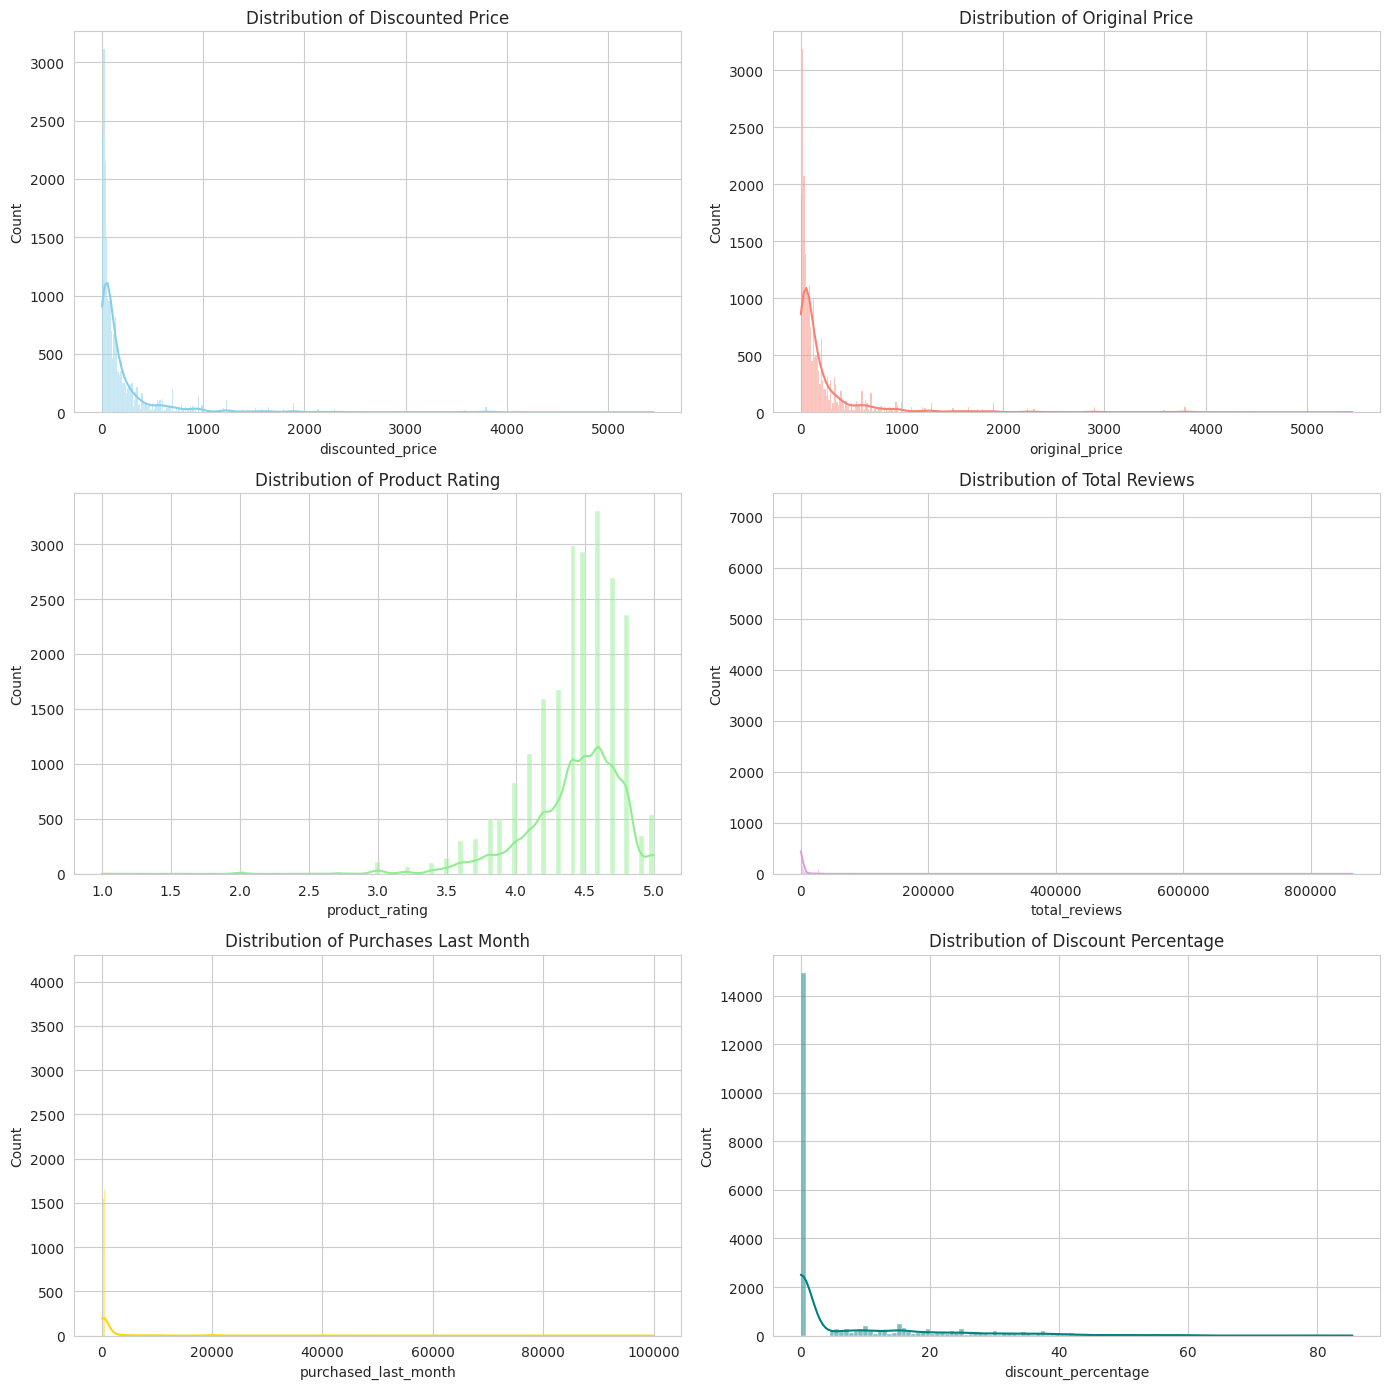

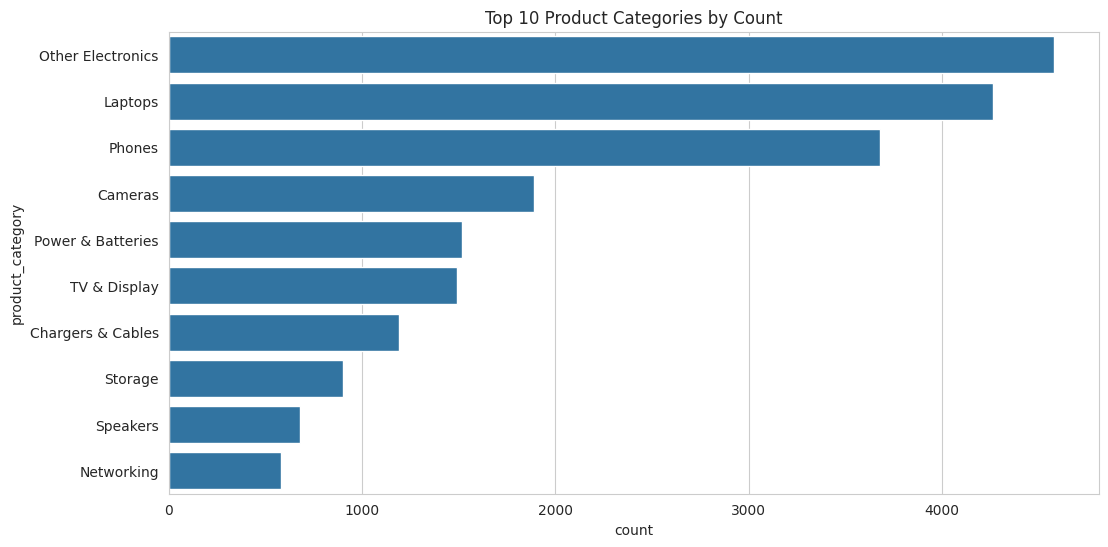

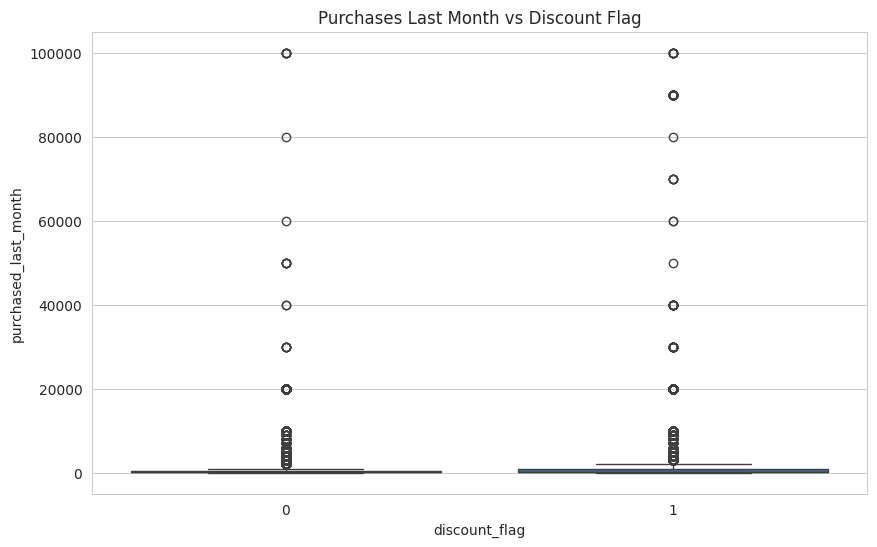

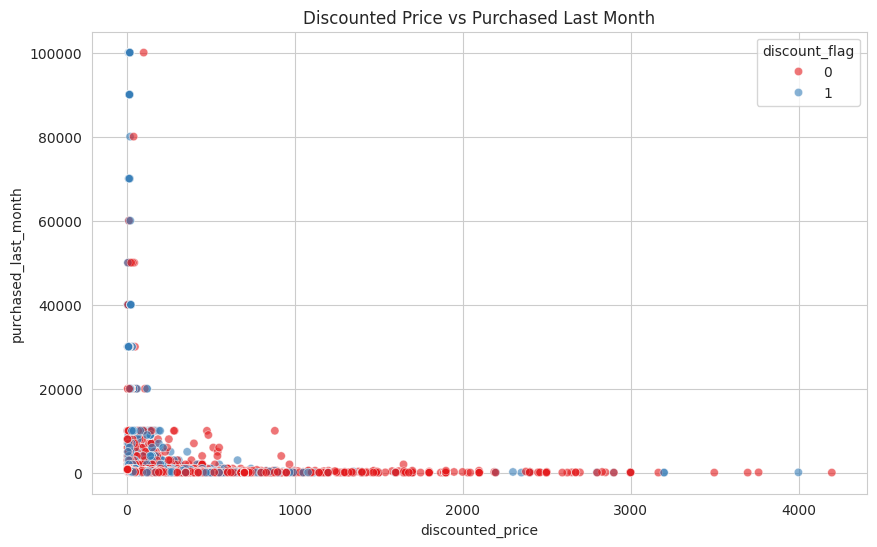

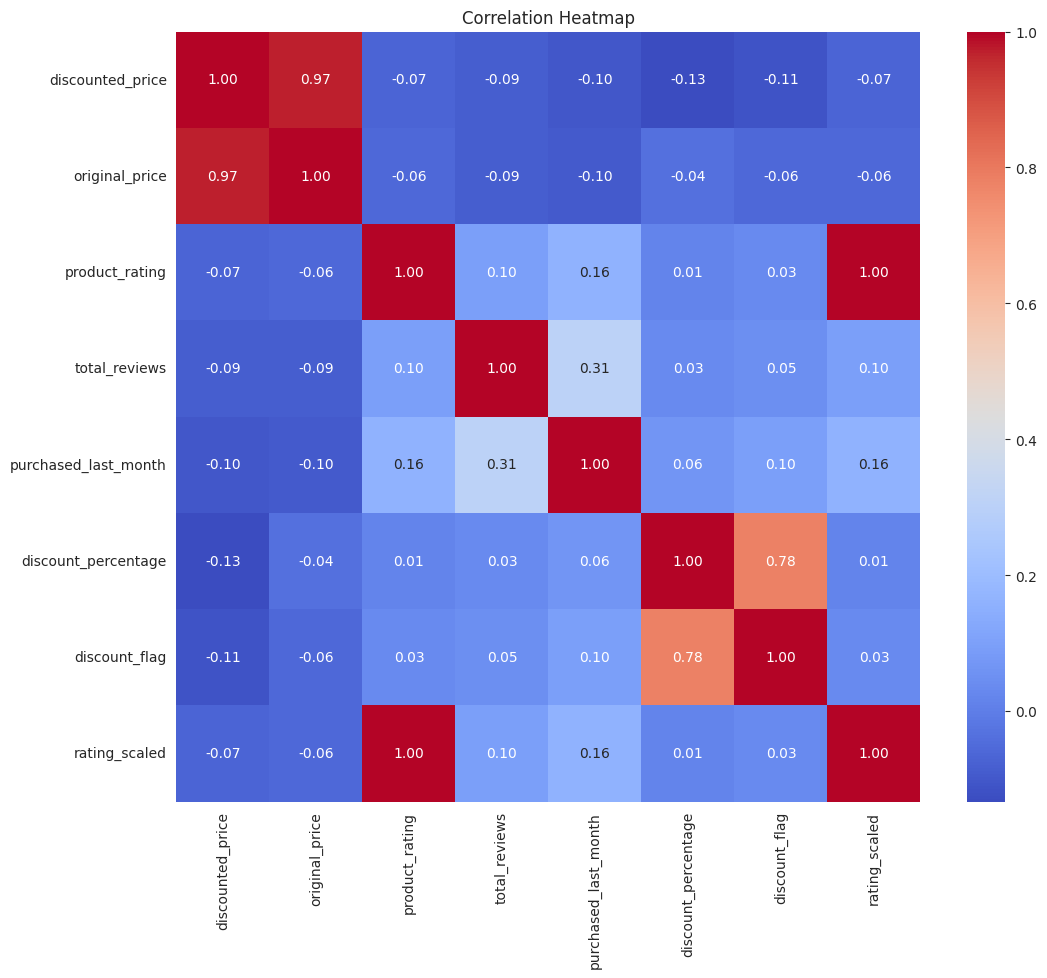

Mann-Whitney U test - Statistic: 42747490.50, P-value: 0.0000
Available months in dataset: [8]


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Distributions for skewed numeric
fig, axs = plt.subplots(3, 2, figsize=(14, 14))
sns.histplot(data['discounted_price'], kde=True, ax=axs[0,0], color='skyblue')
axs[0,0].set_title('Distribution of Discounted Price')
sns.histplot(data['original_price'], kde=True, ax=axs[0,1], color='salmon')
axs[0,1].set_title('Distribution of Original Price')
sns.histplot(data['product_rating'], kde=True, ax=axs[1,0], color='lightgreen')
axs[1,0].set_title('Distribution of Product Rating')
sns.histplot(data['total_reviews'], kde=True, ax=axs[1,1], color='plum')
axs[1,1].set_title('Distribution of Total Reviews')
sns.histplot(data['purchased_last_month'].dropna(), kde=True, ax=axs[2,0], color='gold')
axs[2,0].set_title('Distribution of Purchases Last Month')
sns.histplot(data['discount_percentage'], kde=True, ax=axs[2,1], color='teal')
axs[2,1].set_title('Distribution of Discount Percentage')
plt.tight_layout()
plt.show()

# Top 10 product categories
plt.figure(figsize=(12,6))
top_categories = data['product_category'].value_counts().nlargest(10).index
sns.countplot(y='product_category', data=data[data['product_category'].isin(top_categories)], order=top_categories)
plt.title('Top 10 Product Categories by Count')
plt.show()

# Boxplot: purchases vs discount
plt.figure(figsize=(10,6))
sns.boxplot(x='discount_flag', y='purchased_last_month', data=data)
plt.title('Purchases Last Month vs Discount Flag')
plt.show()

# Scatter: discounted_price vs purchases
plt.figure(figsize=(10,6))
sns.scatterplot(x='discounted_price', y='purchased_last_month', hue='discount_flag', alpha=0.6, palette='Set1', data=data)
plt.title('Discounted Price vs Purchased Last Month')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
num_cols = ['discounted_price', 'original_price', 'product_rating', 'total_reviews', 'purchased_last_month', 'discount_percentage', 'discount_flag', 'rating_scaled']
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# Statistical test and outlier treatment
from scipy.stats import mannwhitneyu

# Outlier treatment (cap at 99th percentile)
purchases_cap = data['purchased_last_month'].quantile(0.99)
reviews_cap = data['total_reviews'].quantile(0.99)
data['purchased_last_month_capped'] = np.where(data['purchased_last_month'] > purchases_cap, purchases_cap, data['purchased_last_month'])
data['total_reviews_capped'] = np.where(data['total_reviews'] > reviews_cap, reviews_cap, data['total_reviews'])

# Mann-Whitney U test for discount effect
discounted = data[data['discount_flag'] == 1]['purchased_last_month'].dropna()
non_discounted = data[data['discount_flag'] == 0]['purchased_last_month'].dropna()

if len(discounted) > 0 and len(non_discounted) > 0:
    stat, p_value = mannwhitneyu(discounted, non_discounted, alternative='two-sided')
    print(f'Mann-Whitney U test - Statistic: {stat:.2f}, P-value: {p_value:.4f}')
else:
    print("Insufficient data for statistical test")

print(f"Available months in dataset: {data['month'].unique()}")

**Predictive Model Training and Evaluation (XGBoost)**

=== PREDICTIVE MODELING - XGBOOST ===
Features selected: 11
Feature names: ['price_log', 'rating_scaled', 'discount_flag', 'discount_percentage', 'category_encoded', 'year', 'month', 'day', 'weekday', 'is_best_seller_bin', 'has_coupon_bin']
Dataset shape: (22425, 11)
Training set size: 17940
Test set size: 4485
Training set after cleaning: 14049
Test set after cleaning: 3535
Training XGBoost model...
Model training completed!

=== MODEL PERFORMANCE ===
XGBoost RMSE: 3745.14
XGBoost R²: 0.717
Mean Absolute Error (MAE): 685.21
Mean Absolute Percentage Error (MAPE): 113.70%


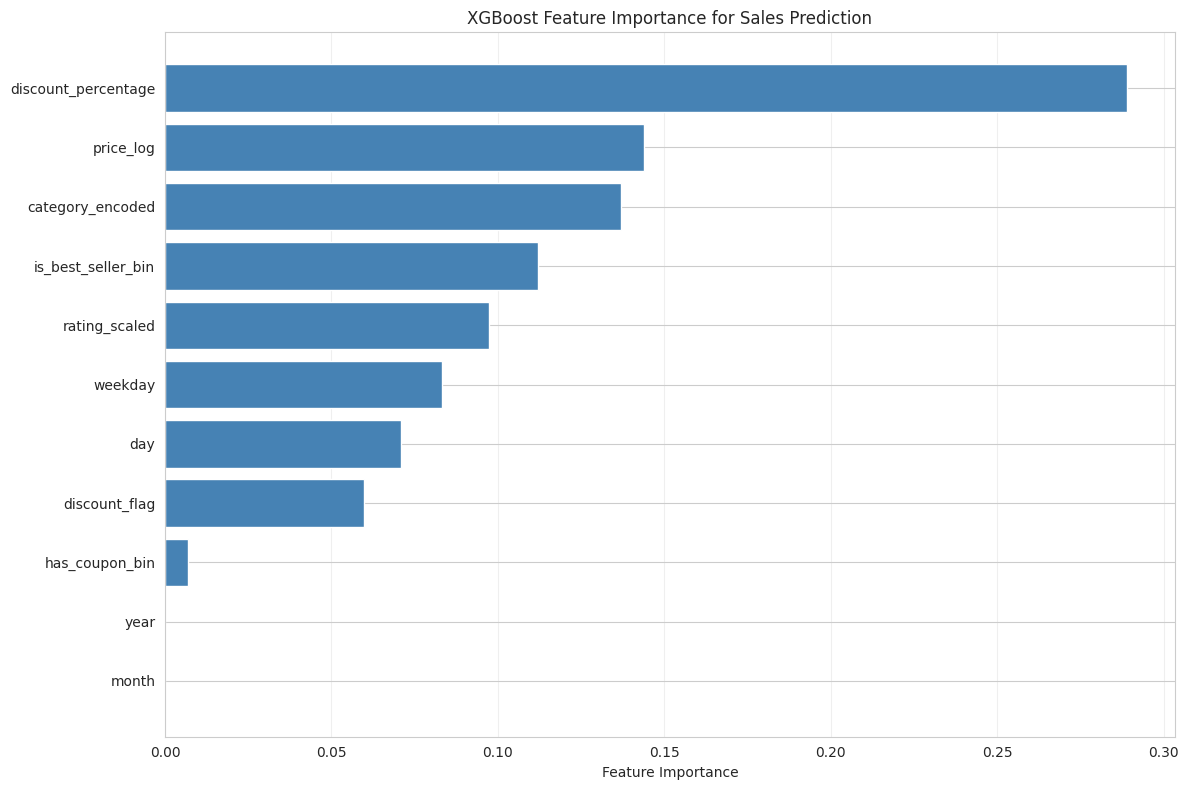


=== TOP 5 IMPORTANT FEATURES ===
1. rating_scaled: 0.097
2. is_best_seller_bin: 0.112
3. category_encoded: 0.137
4. price_log: 0.144
5. discount_percentage: 0.289


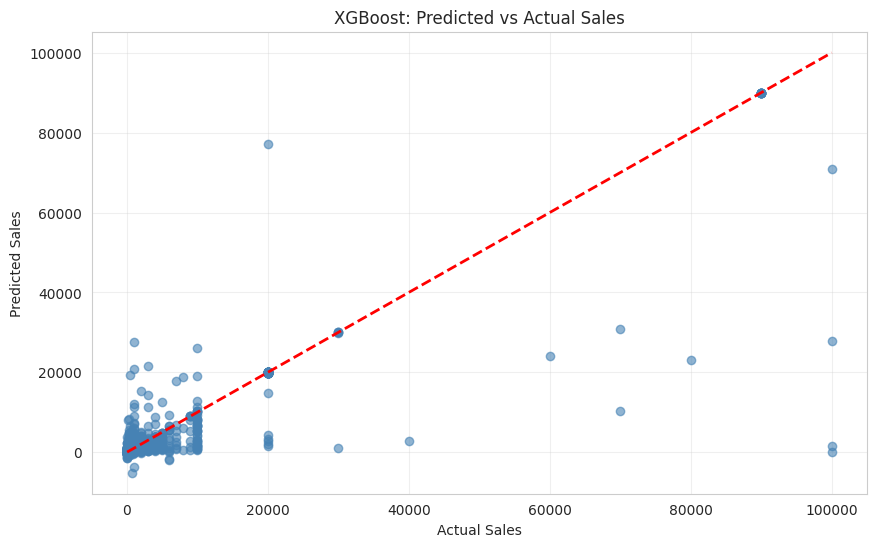

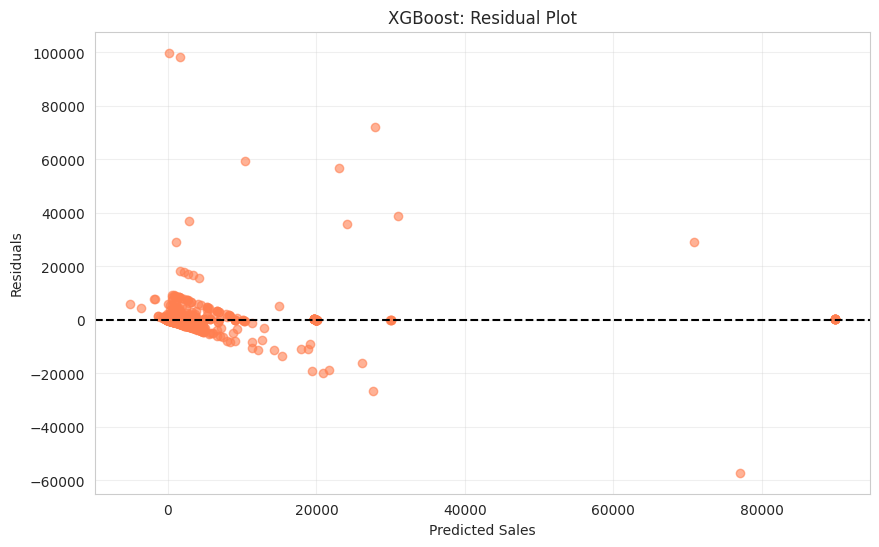


=== XGBOOST MODELING COMPLETE ===


In [4]:
# ===============================================================================
# PREDICTIVE MODELING - XGBOOST
# ===============================================================================

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("=== PREDICTIVE MODELING - XGBOOST ===")

# Feature selection and preparation
feature_cols = [
    'price_log',
    'rating_scaled',
    'discount_flag',
    'discount_percentage',
    'category_encoded',
    'year',
    'month',
    'day',
    'weekday',
    'is_best_seller_bin',
    'has_coupon_bin'
]

# Prepare features and target
X = data[feature_cols].copy()
y = data['purchased_last_month'].copy()

print(f"Features selected: {len(feature_cols)}")
print(f"Feature names: {feature_cols}")
print(f"Dataset shape: {X.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Data cleaning function
def clean_data(X, y):
    """Remove NaN, infinite, and extreme values"""
    mask = (~y.isnull()) & (np.isfinite(y))
    mask &= (~X.isnull().any(axis=1))
    mask &= np.all(np.isfinite(X), axis=1)
    mask &= (y < 1e10)  # Remove extreme outliers
    return X[mask], y[mask]

# Clean training and test data
X_train_clean, y_train_clean = clean_data(X_train, y_train)
X_test_clean, y_test_clean = clean_data(X_test, y_test)

print(f"Training set after cleaning: {X_train_clean.shape[0]}")
print(f"Test set after cleaning: {X_test_clean.shape[0]}")

# XGBoost model training
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse'
)

print("Training XGBoost model...")
xgb_model.fit(X_train_clean, y_train_clean)
print("Model training completed!")

# Make predictions
y_pred = xgb_model.predict(X_test_clean)

# Model evaluation
rmse = np.sqrt(mean_squared_error(y_test_clean, y_pred))
r2 = r2_score(y_test_clean, y_pred)

print("\n=== MODEL PERFORMANCE ===")
print(f'XGBoost RMSE: {rmse:.2f}')
print(f'XGBoost R²: {r2:.3f}')

# Additional metrics
mae = np.mean(np.abs(y_test_clean - y_pred))
mape = np.mean(np.abs((y_test_clean - y_pred) / y_test_clean)) * 100

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Feature importance visualization
plt.figure(figsize=(12, 8))
importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(importance_df['feature'], importance_df['importance'], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance for Sales Prediction')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Top 5 most important features
print("\n=== TOP 5 IMPORTANT FEATURES ===")
top_features = importance_df.tail(5)
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.3f}")

# Prediction vs Actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, y_pred, alpha=0.6, color='steelblue')
plt.plot([y_test_clean.min(), y_test_clean.max()],
         [y_test_clean.min(), y_test_clean.max()],
         'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('XGBoost: Predicted vs Actual Sales')
plt.grid(True, alpha=0.3)
plt.show()

# Residual plot
residuals = y_test_clean - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='coral')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('XGBoost: Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== XGBOOST MODELING COMPLETE ===")

**Predictive Model Training and Evaluation (Random Forest)**

=== PREDICTIVE MODELING - RANDOM FOREST REGRESSOR ===
Features selected: 11
Dataset shape: (22425, 11)
Training set size: 17940
Test set size: 4485
Training set after cleaning: 14049
Test set after cleaning: 3535
Training Random Forest Regressor...
Training complete!

=== MODEL PERFORMANCE ===
Random Forest RMSE: 4011.94
Random Forest R²: 0.675
Random Forest MAE: 635.27
Random Forest MAPE: 86.64%


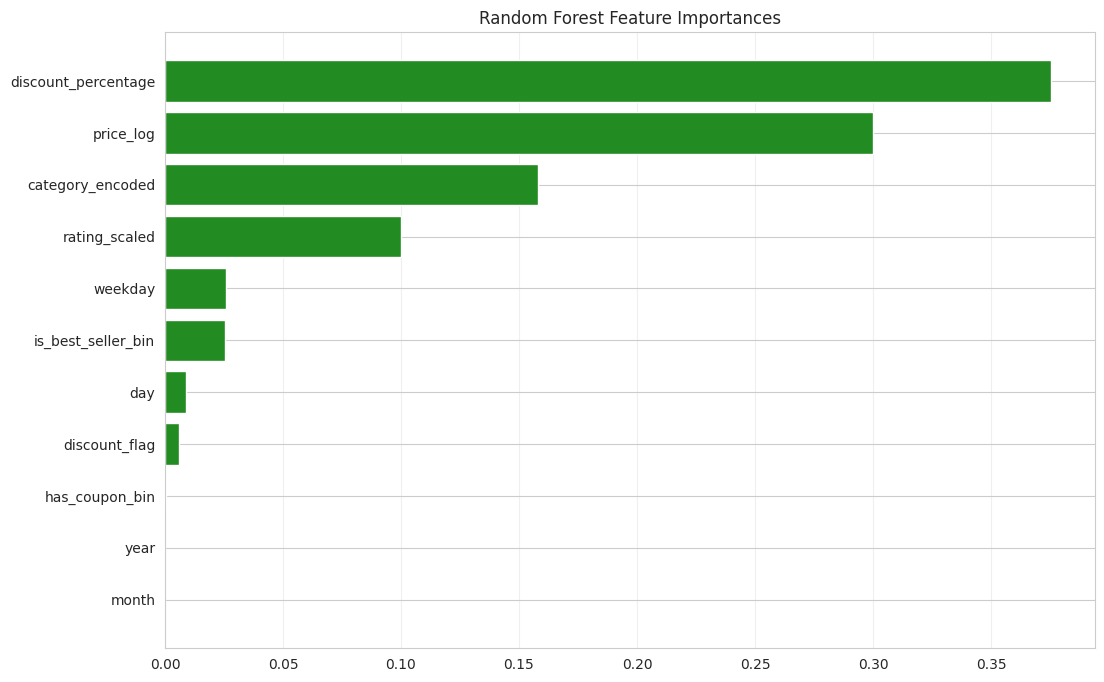

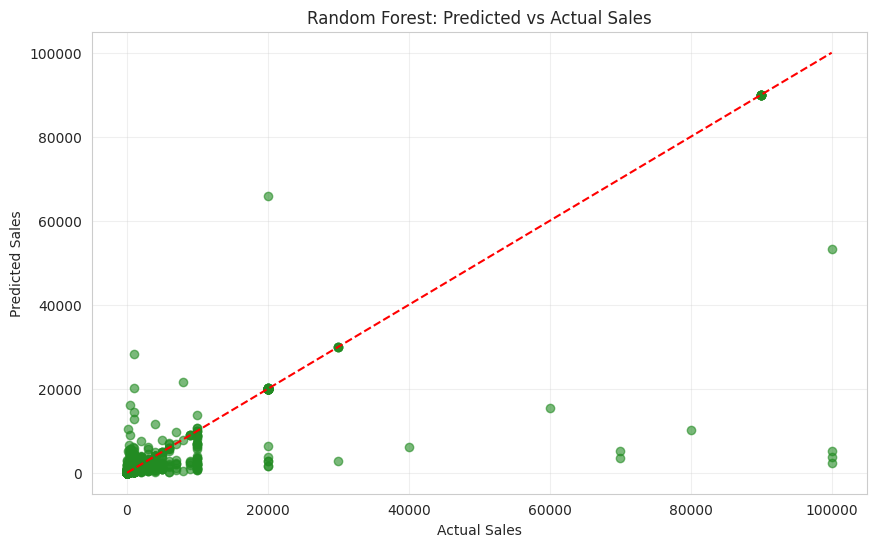


=== RANDOM FOREST MODELING COMPLETE ===


In [5]:
# ===============================================================================
# PREDICTIVE MODELING - RANDOM FOREST REGRESSOR
# ===============================================================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("=== PREDICTIVE MODELING - RANDOM FOREST REGRESSOR ===")

# Use same features as your previous steps
feature_cols = [
    'price_log',
    'rating_scaled',
    'discount_flag',
    'discount_percentage',
    'category_encoded',
    'year',
    'month',
    'day',
    'weekday',
    'is_best_seller_bin',
    'has_coupon_bin'
]

# Prepare features and target
X = data[feature_cols].copy()
y = data['purchased_last_month'].copy()

print(f"Features selected: {len(feature_cols)}")
print(f"Dataset shape: {X.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Data cleaning function
def clean_data(X, y):
    """Remove NaN, infinite, and outliers"""
    mask = (~y.isnull()) & (np.isfinite(y))
    mask &= (~X.isnull().any(axis=1))
    mask &= np.all(np.isfinite(X), axis=1)
    mask &= (y < 1e10)
    return X[mask], y[mask]

# Clean data
X_train_clean, y_train_clean = clean_data(X_train, y_train)
X_test_clean, y_test_clean = clean_data(X_test, y_test)

print(f"Training set after cleaning: {X_train_clean.shape[0]}")
print(f"Test set after cleaning: {X_test_clean.shape[0]}")

# Initialize and train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest Regressor...")
rf_model.fit(X_train_clean, y_train_clean)
print("Training complete!")

# Predict on test set
y_pred = rf_model.predict(X_test_clean)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test_clean, y_pred))
r2 = r2_score(y_test_clean, y_pred)
mae = mean_absolute_error(y_test_clean, y_pred)
mape = np.mean(np.abs((y_test_clean - y_pred) / y_test_clean)) * 100

print("\n=== MODEL PERFORMANCE ===")
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R²: {r2:.3f}")
print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest MAPE: {mape:.2f}%")

# Feature importances
importances_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(importances_df['feature'], importances_df['importance'], color='forestgreen')
plt.title('Random Forest Feature Importances')
plt.grid(axis='x', alpha=0.3)
plt.show()

# Prediction vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, y_pred, alpha=0.6, color='forestgreen')
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest: Predicted vs Actual Sales')
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== RANDOM FOREST MODELING COMPLETE ===")


**Causal Effect Estimation Using Double Machine Learning**

=== CAUSAL INFERENCE - DOUBLE MACHINE LEARNING ===
Setting up causal inference variables...
Treatment variable: discount_flag
Outcome variable: purchased_last_month
Confounding features: 10
Sample size: 22425

Treatment distribution:
  No discount (0): 14,946 products (66.6%)
  With discount (1): 7,479 products (33.4%)
Sample size after cleaning: 17,584
Using subsample of 10,000 for computational efficiency

Initializing Double Machine Learning estimator...
Fitting Double Machine Learning model...
This may take a few minutes...


/usr/local/lib/python3.12/dist-packages/econml/dml/dml.py:192: UserWarning: The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
  warn("The final model has a nonzero intercept for at least one outcome; "
/tmp/ipython-input-1409997298.py:171: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby('price_quartile')['effect'].agg(['mean', 'std']).reset_index()
/tmp/ipython-input-1409997298.py:193: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(effect_by_discount, labels=labels)


DML model training completed!

Estimating treatment effects...

=== CAUSAL EFFECTS SUMMARY ===
Average Treatment Effect (ATE): -1061.20 units
Median Treatment Effect: 215.51 units
Standard Deviation: 6275.74 units
95% Confidence Interval: [-15784.10, 8624.79]
NEGATIVE EFFECT: Discounting decreases sales by 1061 units on average
Business Insight: Discount strategy appears to be COUNTER-PRODUCTIVE


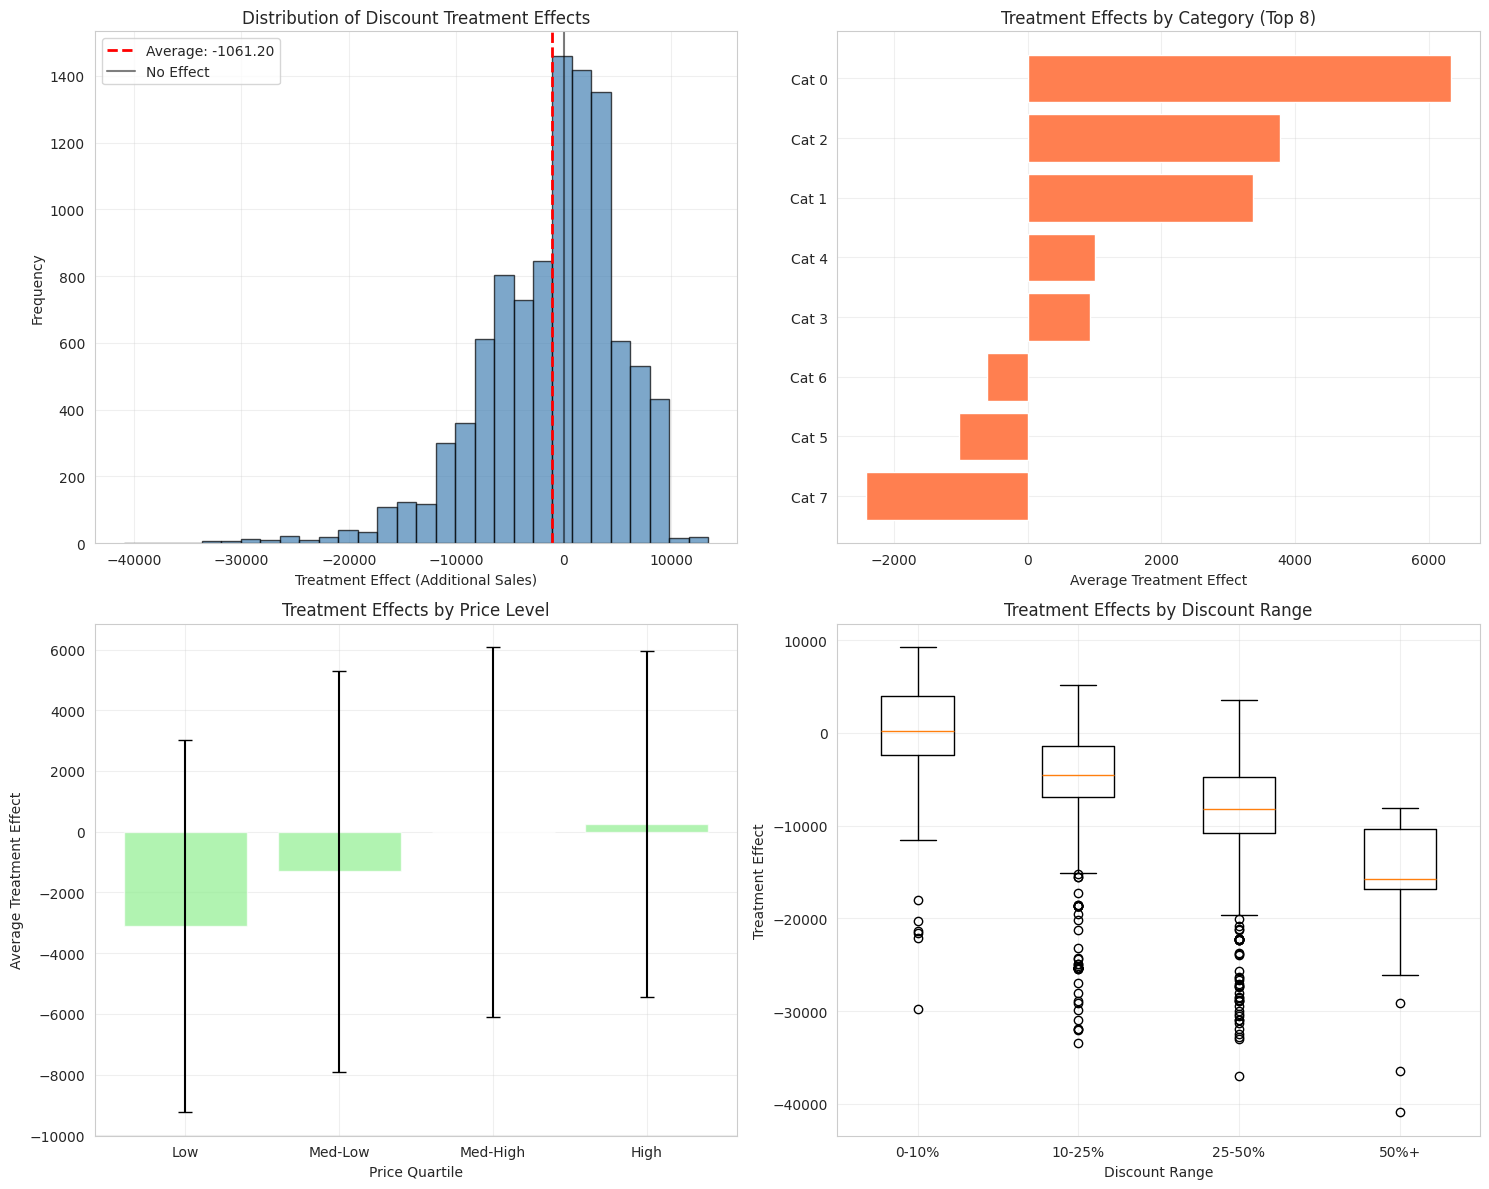


=== DETAILED BUSINESS INSIGHTS ===
Effect Distribution:
  Positive effects: 5,128 products (51.3%)
  Negative effects: 4,872 products (48.7%)

High-Response Segments (Top 25%):
  Average effect in this segment: 5746.20 units
  Range: 3017.04 to 13477.60 units

=== CAUSAL INFERENCE COMPLETE ===


In [6]:
# ===============================================================================
# CAUSAL INFERENCE - DOUBLE MACHINE LEARNING
# ===============================================================================

from econml.dml import DML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== CAUSAL INFERENCE - DOUBLE MACHINE LEARNING ===")

# Treatment and outcome variable setup
print("Setting up causal inference variables...")

# Treatment: discount_flag (binary - discounted vs non-discounted)
treatment = data['discount_flag'].copy()

# Outcome: purchased_last_month (sales volume)
outcome = data['purchased_last_month'].copy()

# Features for confounding control (excluding treatment variable)
causal_feature_cols = [
    'price_log',
    'rating_scaled',
    'discount_percentage',  # Keep this as it's continuous discount amount
    'category_encoded',
    'year',
    'month',
    'day',
    'weekday',
    'is_best_seller_bin',
    'has_coupon_bin'
]

features_causal = data[causal_feature_cols].copy()

print(f"Treatment variable: discount_flag")
print(f"Outcome variable: purchased_last_month")
print(f"Confounding features: {len(causal_feature_cols)}")
print(f"Sample size: {len(treatment)}")

# Check treatment distribution
treatment_counts = treatment.value_counts()
print(f"\nTreatment distribution:")
print(f"  No discount (0): {treatment_counts[0]:,} products ({treatment_counts[0]/len(treatment)*100:.1f}%)")
print(f"  With discount (1): {treatment_counts[1]:,} products ({treatment_counts[1]/len(treatment)*100:.1f}%)")

# Clean data for causal analysis
def clean_causal_data(outcome, treatment, features):
    """Clean data for causal inference"""
    mask = (~outcome.isnull()) & (~treatment.isnull())
    mask &= (~features.isnull().any(axis=1))
    mask &= np.isfinite(outcome) & np.isfinite(treatment)
    mask &= np.all(np.isfinite(features), axis=1)
    mask &= (outcome < 1e10)  # Remove extreme outliers

    return outcome[mask], treatment[mask], features[mask]

# Clean the data
outcome_clean, treatment_clean, features_clean = clean_causal_data(
    outcome, treatment, features_causal
)

print(f"Sample size after cleaning: {len(outcome_clean):,}")

# Subsample for computational efficiency if dataset is very large
if len(outcome_clean) > 10000:
    sample_size = 10000
    sample_indices = np.random.choice(len(outcome_clean), sample_size, replace=False)
    outcome_sample = outcome_clean.iloc[sample_indices]
    treatment_sample = treatment_clean.iloc[sample_indices]
    features_sample = features_clean.iloc[sample_indices]
    print(f"Using subsample of {sample_size:,} for computational efficiency")
else:
    outcome_sample = outcome_clean
    treatment_sample = treatment_clean
    features_sample = features_clean

# Fixed DML estimator with proper classifiers and regularization
print("\nInitializing Double Machine Learning estimator...")

dml_estimator = DML(
    model_y=RandomForestRegressor(
        n_estimators=50,  # Reduced for speed
        max_depth=6,
        min_samples_split=50,  # Increased for stability
        random_state=42
    ),
    model_t=RandomForestClassifier(  # Use CLASSIFIER for binary treatment
        n_estimators=50,
        max_depth=6,
        min_samples_split=50,
        random_state=42
    ),
    model_final=Ridge(alpha=1.0),  # Use Ridge for regularization
    discrete_treatment=True,
    random_state=42
)

print("Fitting Double Machine Learning model...")
print("This may take a few minutes...")

try:
    # Fit the causal model
    dml_estimator.fit(outcome_sample, treatment_sample, X=features_sample)
    print("DML model training completed!")

    # Causal effect estimation
    print("\nEstimating treatment effects...")

    # Get individual treatment effects
    treatment_effects = dml_estimator.effect(features_sample)

    # Summary statistics
    avg_treatment_effect = np.mean(treatment_effects)
    median_treatment_effect = np.median(treatment_effects)
    std_treatment_effect = np.std(treatment_effects)

    print("\n=== CAUSAL EFFECTS SUMMARY ===")
    print(f"Average Treatment Effect (ATE): {avg_treatment_effect:.2f} units")
    print(f"Median Treatment Effect: {median_treatment_effect:.2f} units")
    print(f"Standard Deviation: {std_treatment_effect:.2f} units")
    print(f"95% Confidence Interval: [{np.percentile(treatment_effects, 2.5):.2f}, {np.percentile(treatment_effects, 97.5):.2f}]")

    # Interpret the business meaning
    if avg_treatment_effect > 0:
        print(f"POSITIVE EFFECT: Discounting increases sales by {avg_treatment_effect:.0f} units on average")
        effectiveness = "EFFECTIVE"
    else:
        print(f"NEGATIVE EFFECT: Discounting decreases sales by {abs(avg_treatment_effect):.0f} units on average")
        effectiveness = "COUNTER-PRODUCTIVE"

    print(f"Business Insight: Discount strategy appears to be {effectiveness}")

    # Treatment effect visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Distribution of treatment effects
    axes[0,0].hist(treatment_effects, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0,0].axvline(avg_treatment_effect, color='red', linestyle='--', linewidth=2,
                     label=f'Average: {avg_treatment_effect:.2f}')
    axes[0,0].axvline(0, color='black', linestyle='-', alpha=0.5, label='No Effect')
    axes[0,0].set_xlabel('Treatment Effect (Additional Sales)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_title('Distribution of Discount Treatment Effects')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # 2. Treatment effects by product category (top 8)
    category_effects = pd.DataFrame({
        'category': features_sample['category_encoded'],
        'effect': treatment_effects
    }).groupby('category')['effect'].mean().sort_values(ascending=True)

    top_categories = category_effects.tail(8)
    axes[0,1].barh(range(len(top_categories)), top_categories.values, color='coral')
    axes[0,1].set_yticks(range(len(top_categories)))
    axes[0,1].set_yticklabels([f'Cat {int(cat)}' for cat in top_categories.index])
    axes[0,1].set_xlabel('Average Treatment Effect')
    axes[0,1].set_title('Treatment Effects by Category (Top 8)')
    axes[0,1].grid(True, alpha=0.3)

    # 3. Treatment effects by price level
    price_quartiles = pd.qcut(features_sample['price_log'], 4, labels=['Low', 'Med-Low', 'Med-High', 'High'])
    price_effects = pd.DataFrame({
        'price_quartile': price_quartiles,
        'effect': treatment_effects
    }).groupby('price_quartile')['effect'].agg(['mean', 'std']).reset_index()

    axes[1,0].bar(price_effects['price_quartile'], price_effects['mean'],
                 yerr=price_effects['std'], capsize=5, color='lightgreen', alpha=0.7)
    axes[1,0].set_xlabel('Price Quartile')
    axes[1,0].set_ylabel('Average Treatment Effect')
    axes[1,0].set_title('Treatment Effects by Price Level')
    axes[1,0].grid(True, alpha=0.3)

    # 4. Box plot of effects by discount percentage ranges
    discount_ranges = pd.cut(features_sample['discount_percentage'],
                           bins=[0, 10, 25, 50, 100],
                           labels=['0-10%', '10-25%', '25-50%', '50%+'])

    effect_by_discount = []
    labels = []
    for label in ['0-10%', '10-25%', '25-50%', '50%+']:
        mask = discount_ranges == label
        if mask.sum() > 10:  # Only include if enough samples
            effect_by_discount.append(treatment_effects[mask])
            labels.append(label)

    axes[1,1].boxplot(effect_by_discount, labels=labels)
    axes[1,1].set_xlabel('Discount Range')
    axes[1,1].set_ylabel('Treatment Effect')
    axes[1,1].set_title('Treatment Effects by Discount Range')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Business insights analysis
    print("\n=== DETAILED BUSINESS INSIGHTS ===")

    # Heterogeneity analysis
    positive_effects = treatment_effects > 0
    negative_effects = treatment_effects < 0

    print(f"Effect Distribution:")
    print(f"  Positive effects: {positive_effects.sum():,} products ({positive_effects.mean()*100:.1f}%)")
    print(f"  Negative effects: {negative_effects.sum():,} products ({negative_effects.mean()*100:.1f}%)")

    # Most responsive segments
    if len(treatment_effects) > 10:
        high_effect_threshold = np.percentile(treatment_effects, 75)
        high_responders = treatment_effects >= high_effect_threshold

        print(f"\nHigh-Response Segments (Top 25%):")
        print(f"  Average effect in this segment: {treatment_effects[high_responders].mean():.2f} units")
        print(f"  Range: {treatment_effects[high_responders].min():.2f} to {treatment_effects[high_responders].max():.2f} units")

    print("\n=== CAUSAL INFERENCE COMPLETE ===")

except Exception as e:
    print(f"DML fitting failed: {str(e)}")
    print("\nUsing alternative approach: Simple treatment effect estimation")

    # Fallback: Simple comparison approach
    discounted_sales = outcome_sample[treatment_sample == 1]
    non_discounted_sales = outcome_sample[treatment_sample == 0]

    simple_effect = discounted_sales.mean() - non_discounted_sales.mean()

    print(f"Simple Average Treatment Effect: {simple_effect:.2f} units")
    print(f"Discounted products average sales: {discounted_sales.mean():.2f}")
    print(f"Non-discounted products average sales: {non_discounted_sales.mean():.2f}")

    if simple_effect > 0:
        print("Simple analysis suggests discounting is EFFECTIVE")
    else:
        print("Simple analysis suggests discounting is COUNTER-PRODUCTIVE")


**Data-Driven Discount Targeting and Optimization**

Discount targeting summary:
target_discount
False    7500
True     2500
Name: count, dtype: int64
Average uplift for targeted segment: 5746.20
Expected total sales uplift (targeted discount): 14365506
Avoided negative uplift (excluded non-targets): -24977460
Fraction of products recommended for discount per category:
 category_encoded
0     0.852349
2     0.722222
1     0.702655
3     0.498305
4     0.480836
5     0.220588
7     0.096026
6     0.002319
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
Name: target_discount, dtype: float64
Fraction of products recommended for discount per price segment:
 price_log
(1.1500000000000001, 3.276]    0.128832
(3.276, 4.331]                 0.232253
(4.331, 5.198]                 0.307197
(5.198, 8.233]                 0.335334
Name: target_discount, dtype: float64


/tmp/ipython-input-3914683301.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seg_price = optimization_df.groupby(pd.qcut(optimization_df['price_log'], 4))['target_discount'].mean()


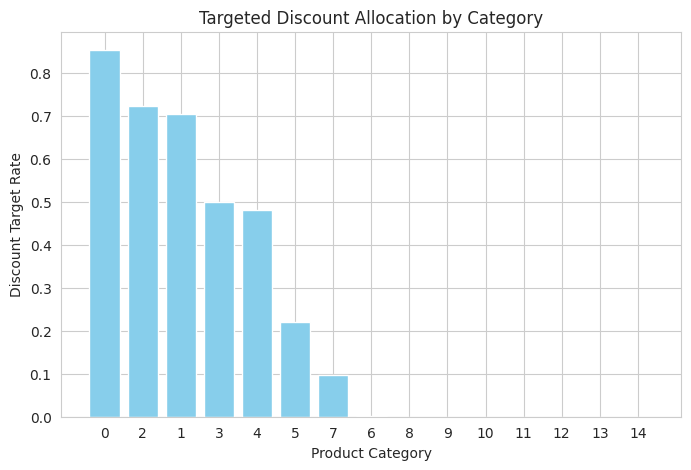

In [7]:
# ===============================================================================
# OPTIMIZATION: DATA-DRIVEN DISCOUNT STRATEGY
# ===============================================================================

import pandas as pd
import numpy as np

# Assume you have: features_sample, treatment_effects from previous DML step
# You want to target only the top positive effect segments

# Combine features and effects for analysis
optimization_df = features_sample.copy()
optimization_df['treatment_effect'] = treatment_effects

# Choose a segment or threshold for "targeted" discounting, e.g. top 25% effects
threshold = np.percentile(optimization_df['treatment_effect'], 75)
optimization_df['target_discount'] = optimization_df['treatment_effect'] >= threshold

print("Discount targeting summary:")
print(optimization_df['target_discount'].value_counts())
print(f"Average uplift for targeted segment: {optimization_df.loc[optimization_df['target_discount'], 'treatment_effect'].mean():.2f}")

# Simulate profit impact: only apply discount to targeted segment
# Assume: profit_margin = discounted_price - cost_price
# For business reporting, you could compute expected total uplift for all products if targeted

expected_total_uplift = optimization_df.loc[optimization_df['target_discount'], 'treatment_effect'].sum()
expected_total_negative = optimization_df.loc[~optimization_df['target_discount'], 'treatment_effect'].sum()
print(f"Expected total sales uplift (targeted discount): {expected_total_uplift:.0f}")
print(f"Avoided negative uplift (excluded non-targets): {expected_total_negative:.0f}")

# Optional: see segments by product category or price quartile
seg_cat = optimization_df.groupby(['category_encoded'])['target_discount'].mean().sort_values(ascending=False)
print("Fraction of products recommended for discount per category:\n", seg_cat)

seg_price = optimization_df.groupby(pd.qcut(optimization_df['price_log'], 4))['target_discount'].mean()
print("Fraction of products recommended for discount per price segment:\n", seg_price)

# Visualize targeted discount allocation
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(seg_cat.index.astype(str), seg_cat.values, color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Discount Target Rate')
plt.title('Targeted Discount Allocation by Category')
plt.show()


**SIMULATE OPTIMAL DISCOUNT LEVELS USING SALES PREDICTION MODEL**

       optimal_discount_percentage  predicted_sales
count                  2500.000000      2500.000000
mean                     36.758000      2837.465576
std                      11.217387      3396.409180
min                       0.000000        12.986080
25%                      35.000000       840.509888
50%                      35.000000      1687.089355
75%                      50.000000      3158.717285
max                      50.000000     46133.562500
Average Optimal Discount by Category:
 category_encoded
0     34.330709
1     36.335013
2     32.478632
3     39.693878
4     36.816770
5     42.083333
6     30.000000
7     44.971264
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
Name: optimal_discount_percentage, dtype: float64


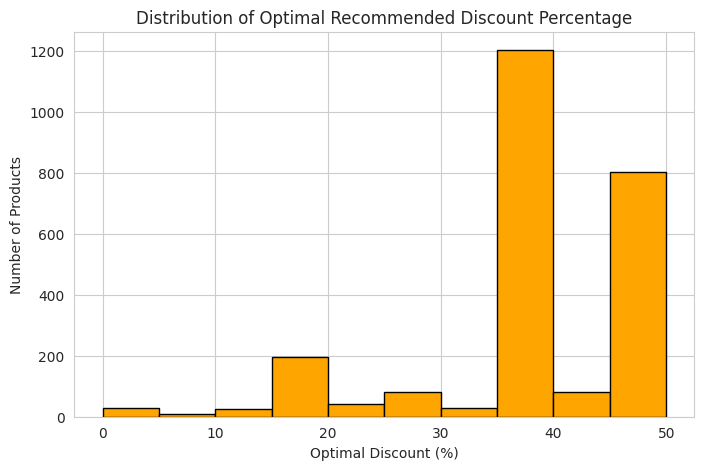

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Merge discounted_price from original data if missing
if 'discounted_price' not in optimization_df.columns:
    optimization_df = optimization_df.merge(
        data[['discounted_price']],
        left_index=True,
        right_index=True,
        how='left'
    )

# Define discount levels to simulate (0% to 50% by 5%)
discount_grid = np.arange(0, 51, 5)

# Placeholder list to collect simulation results
optimal_discounts = []

# Ensure your feature columns for prediction
feature_cols = [
    'price_log', 'rating_scaled', 'discount_flag', 'discount_percentage',
    'category_encoded', 'year', 'month', 'day', 'weekday', 'is_best_seller_bin', 'has_coupon_bin'
]

# Iterate over all products recommended for discount in optimization_df
for idx, row in optimization_df[optimization_df['target_discount']].iterrows():
    product_row = row.copy()
    sim_results = []

    for d in discount_grid:
        # Simulate discount in percentage
        product_sim = product_row.copy()
        product_sim['discount_percentage'] = d
        product_sim['discount_flag'] = int(d > 0)

        # Adjust price_log assuming the discounted price changes accordingly
        product_sim['price_log'] = np.log1p(product_sim['discounted_price'] * (1 - d / 100))

        # Prepare features for model prediction (use only feature columns)
        X_sim = pd.DataFrame([product_sim[feature_cols].values], columns=feature_cols)

        # Predict sales using your trained model (XGBoost or Random Forest)
        sales_pred = xgb_model.predict(X_sim)[0]  # Change to rf_model.predict(X_sim)[0] if needed

        sim_results.append((d, sales_pred))

    # Find discount with max predicted sales
    best_discount, best_sales = max(sim_results, key=lambda x: x[1])

    optimal_discounts.append({
        'index': idx,
        'optimal_discount_percentage': best_discount,
        'predicted_sales': best_sales
    })

# Convert simulation results to DataFrame and merge back into optimization_df
optimal_discount_df = pd.DataFrame(optimal_discounts).set_index('index')
optimization_df = optimization_df.join(optimal_discount_df)

# Summary statistics on recommended discounts
print(optimization_df[['optimal_discount_percentage', 'predicted_sales']].describe())

# Average recommended discount by product category
category_discount_avg = optimization_df.groupby('category_encoded')['optimal_discount_percentage'].mean()
print("Average Optimal Discount by Category:\n", category_discount_avg)

# Visualize distribution of optimal discounts
plt.figure(figsize=(8,5))
plt.hist(optimization_df['optimal_discount_percentage'], bins=range(0, 55, 5), color='orange', edgecolor='black')
plt.title('Distribution of Optimal Recommended Discount Percentage')
plt.xlabel('Optimal Discount (%)')
plt.ylabel('Number of Products')
plt.show()


**Product segmentation based on treatment effect levels**




Segment Summary:
                    product_count  avg_discount  total_uplift   avg_uplift  \
response_segment                                                             
High Response                   0           NaN  3.895449e+06  1558.179727   
Low Response                    0           NaN -2.397678e+07 -9499.516216   
Medium Response                 0           NaN -4.896131e+06 -1977.435595   
Very High Response           2500        36.758  1.436551e+07  5746.202595   

                    predicted_sales_sum  current_sales_sum  
response_segment                                            
High Response                       0.0          1487050.0  
Low Response                        0.0          8482550.0  
Medium Response                     0.0          3928200.0  
Very High Response            7093664.5          1148950.0  

Revenue Impact by Segment:
                    current_revenue  projected_revenue  revenue_change
response_segment                                

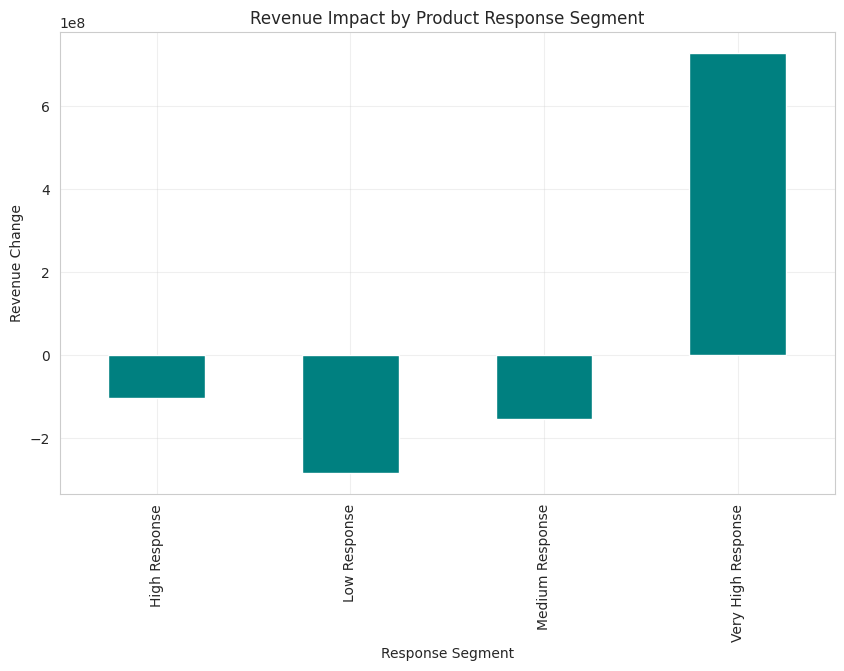

In [12]:
import numpy as np

# Define quartile boundaries for treatment effect
boundaries = np.percentile(optimization_df['treatment_effect'], [25, 50, 75])

# Create conditions for segmentation
conditions = [
    optimization_df['treatment_effect'] <= boundaries[0],  # Low Response
    (optimization_df['treatment_effect'] > boundaries[0]) & (optimization_df['treatment_effect'] <= boundaries[1]),  # Medium Response
    (optimization_df['treatment_effect'] > boundaries[1]) & (optimization_df['treatment_effect'] <= boundaries[2]),  # High Response
    optimization_df['treatment_effect'] > boundaries[2]  # Very High Response
]

# Corresponding segment labels
segments = ['Low Response', 'Medium Response', 'High Response', 'Very High Response']

# Assign segment with default value to avoid dtype error
optimization_df['response_segment'] = np.select(conditions, segments, default='Low Response')

# Segment-wise summary: count, avg discount, total uplift, avg uplift, predicted and current sales sums
segment_summary = optimization_df.groupby('response_segment').agg(
    product_count=('optimal_discount_percentage', 'count'),
    avg_discount=('optimal_discount_percentage', 'mean'),
    total_uplift=('treatment_effect', 'sum'),
    avg_uplift=('treatment_effect', 'mean'),
    predicted_sales_sum=('predicted_sales', 'sum')
)

# Calculate current sales sum per segment
current_sales_sums = []
for segment in segment_summary.index:
    indices = optimization_df[optimization_df['response_segment'] == segment].index
    current_sales_sums.append(data.loc[indices, 'purchased_last_month'].sum())
segment_summary['current_sales_sum'] = current_sales_sums

print("\nSegment Summary:")
print(segment_summary)

# Calculate projected and current revenue per segment
optimization_df['projected_revenue'] = optimization_df['predicted_sales'] * optimization_df['discounted_price']

revenue_summary = optimization_df.groupby('response_segment')['projected_revenue'].sum()

current_revenue_sums = []
for segment in revenue_summary.index:
    indices = optimization_df[optimization_df['response_segment'] == segment].index
    current_revenue_sums.append((data.loc[indices, 'purchased_last_month'] * data.loc[indices, 'discounted_price']).sum())

revenue_comparison = pd.DataFrame({
    'current_revenue': current_revenue_sums,
    'projected_revenue': revenue_summary
})
revenue_comparison['revenue_change'] = revenue_comparison['projected_revenue'] - revenue_comparison['current_revenue']

print("\nRevenue Impact by Segment:")
print(revenue_comparison)

# Visualization of revenue change by segment
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
revenue_comparison['revenue_change'].plot(kind='bar', color='teal')
plt.title('Revenue Impact by Product Response Segment')
plt.xlabel('Response Segment')
plt.ylabel('Revenue Change')
plt.grid(True, alpha=0.3)
plt.show()


**Business Impact Visualization and Executive Insights**

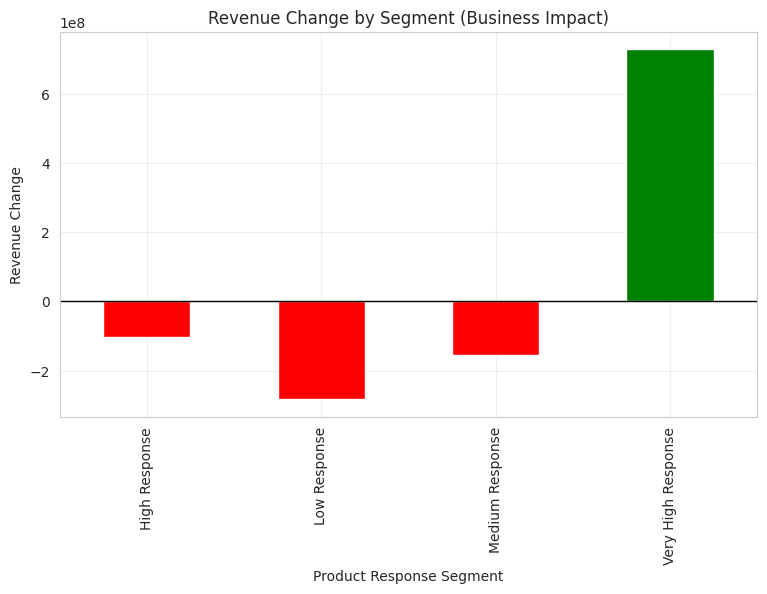

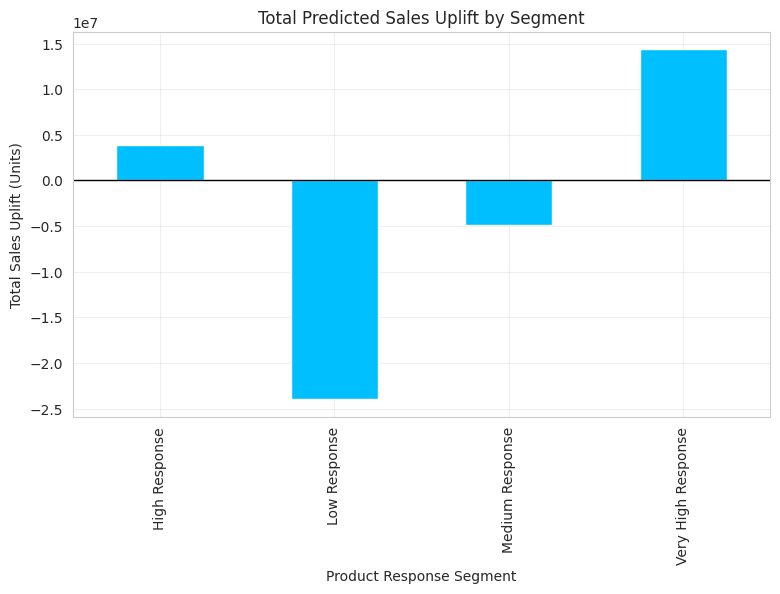


Business Impact Segment Summary:
                    product_count  avg_discount  current_revenue  \
response_segment                                                   
High Response                   0           NaN      102650662.0   
Low Response                    0           NaN      283325437.0   
Medium Response                 0           NaN      153622381.0   
Very High Response           2500         36.76      106413084.5   

                    projected_revenue  revenue_change  total_uplift  \
response_segment                                                      
High Response            0.000000e+00   -1.026507e+08    3895449.32   
Low Response             0.000000e+00   -2.833254e+08  -23976778.93   
Medium Response          0.000000e+00   -1.536224e+08   -4896130.53   
Very High Response       8.354895e+08    7.290764e+08   14365506.49   

                    predicted_sales_sum  current_sales_sum  
response_segment                                            
High Res

In [14]:
import matplotlib.pyplot as plt

# First, ensure summary_table as in previous steps
summary_table = revenue_comparison.copy()
summary_table['product_count'] = segment_summary['product_count']
summary_table['avg_discount'] = segment_summary['avg_discount']
summary_table['total_uplift'] = segment_summary['total_uplift']
summary_table['predicted_sales_sum'] = segment_summary['predicted_sales_sum']
summary_table['current_sales_sum'] = segment_summary['current_sales_sum']

# 1. Bar Chart: Revenue Change by Segment
plt.figure(figsize=(9,5))
summary_table['revenue_change'].plot(kind='bar', color=['red' if x < 0 else 'green' for x in summary_table['revenue_change']])
plt.title('Revenue Change by Segment (Business Impact)')
plt.xlabel('Product Response Segment')
plt.ylabel('Revenue Change')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='black', linewidth=1)
plt.show()

# 2. Bar Chart: Total Uplift by Segment
plt.figure(figsize=(9,5))
summary_table['total_uplift'].plot(kind='bar', color='deepskyblue')
plt.title('Total Predicted Sales Uplift by Segment')
plt.xlabel('Product Response Segment')
plt.ylabel('Total Sales Uplift (Units)')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, alpha=0.3)
plt.show()


# 3. Display executive-friendly summary table (rounded for clarity)
display_cols = [
    'product_count', 'avg_discount', 'current_revenue', 'projected_revenue',
    'revenue_change', 'total_uplift', 'predicted_sales_sum', 'current_sales_sum'
]
print('\nBusiness Impact Segment Summary:')
print(summary_table[display_cols].round(2))
